# **Short Summary Report**

- Choosing Domain Area of Value
For our project, when it came to choosing our domain area of value, we decided to go with something historical and that wouldn't be too difficult to work with when it comes to predicting an outcome from the rest of the given columns as input.
- Finding Dataset for Preprocessing
We found a dataset that we felt was sufficiently good enough for preprocessing within Kaggle. In this case, our chosen dataset was regarding the Titanic and its passengers. All we had to do was manually re-engineer it a bit so that we could work with it. Here, you can find the dataset from the link posted below:

https://www.kaggle.com/datasets/fossouodonald/titaniccsv

- Making Dataset Ready for Preprocessing
Our dataset was already pretty well set for preprocessing in that it had many missing values and outliers in it, so it had something we could work on. One thing we could still do was manually add in duplicate values, so one of our team members went ahead and manually added 50 duplicate rows at random, just so that we can get started and continue with the project.
- Document Techniques for Preprocessing
Data quality issues: Data quality issues include missing values, duplicate data, noise, and outliers. These issues can affect the data for preprocessing and have an adverse effect on data mining.

Training and Validation: A machine learning model will learn from the training data and then be evaluated based on the validation data.

Aggregation: Data aggregation is a preprocessing task where the values of two or more objects are combined into a single object. The motivation for aggregation includes: Reducing the size of data to be processed. Changing the granularity of analysis (from fine-scale to coarser-scale). Improving the stability of the data. 

Sampling: Sampling is an approach commonly used to facilitate Data reduction for exploratory data analysis and scaling up algorithms to big data applications. Quantifying uncertainties due to varying data distributions.

Discretization: Discretization is a data preprocessing step used to transform a continuous-valued attribute into a categorical attribute.

Binarization Attribute Transformation: This is a process where data is mapped with one or more binary variables.

Dimensionality reduction: When data increases along with sparsity, it takes more space to represent the data. This makes it more difficult to find outliers and makes it harder to cluster more relevant data. Dimensionality reduction helps with decreasing the sparsity of data, reducing the density of data, and helping with better visualization of data. One of the main techniques for dimensionality reduction is Principal Component Analysis (PCA).

Feature subset selection: Helps with the reduction of both duplicate data and dimensionality.

Feature creation: When preprocessing data, feature creation is helpful for creating new subcategories to capture more useful and important data.

- Showing All Steps for Preprocessing

For this step, you can just open the table of contents on the left and see everything we did.

When we worked on preprocessing, we felt that it would be necessary to deal with duplicates, missing values, and with unnecessary columns first because we felt it would save time and processing power for the later steps if we can make our data easier to understand and easier to work with. We then decided to get rid of certain outliers for the same reason (*although we split the dataframe into three groups). After that, we would combine the dataframes and then perform the rest of the steps, which we felt would benefit from being executed with a smaller and cleaner dataframe. This was how we determined the order in which to do things.

- Documenting Insights after Preprocessing

*See table of contents.

- Splitting Dataset and Calculating Means and Standard Deviations

*See table of contents.

- Comparing Datasets and Developing Intuitions

*See table of contents.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving titanic2.csv to titanic2.csv


# **Data Quality Issues**

Our dataset has a few quality issues. This includes some duplicate data, missing values, and outliers.

In [ ]:
import pandas as pd
import os
import numpy as np
from scipy.stats import zscore

df = pd.read_csv('titanic2.csv')
df_backup = pd.read_csv('titanic2.csv')

print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
print('')

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('')

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))
print('')

df.head()

Number of instances = 891
Number of attributes = 12

Number of duplicate rows = 0

Number of missing values:
	PassengerId: 0
	Survived: 0
	Pclass: 0
	Name: 0
	Sex: 0
	Age: 177
	SibSp: 0
	Parch: 0
	Ticket: 0
	Fare: 0
	Cabin: 687
	Embarked: 2



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Since the 'Fare' attribute is an ordinal attribute, we want to evaluate if there might be outliers in the data.

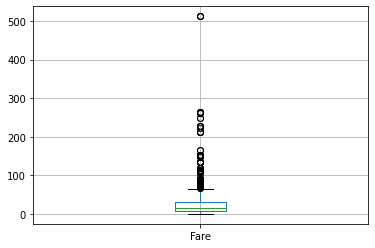

In [ ]:
boxplot = df.boxplot(column=['Fare'])  

# **Data Preprocessing**

#**Removing Duplicate Values**
We begin by removing duplicate rows in the data.

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df.shape[0]))

Number of duplicate rows = 0
Number of rows before discarding duplicates = 891
Number of rows after discarding duplicates = 891


#**Processing Missing Values**#
Next, we evaluate what to do with our missing values.

In [ ]:
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))
print('')

Number of missing values:
	PassengerId: 0
	Survived: 0
	Pclass: 0
	Name: 0
	Sex: 0
	Age: 177
	SibSp: 0
	Parch: 0
	Ticket: 0
	Fare: 0
	Cabin: 687
	Embarked: 2



With duplicates removed, we have 117 rows that are missing the 'Age' attribute, 686 rows that are missing the 'Cabin' attribute, and 2 rows that are missing the 'Embarked' attribute. 

#**Dropping Fields**#
Considering that most of the cabin numbers of the passengers were not recorded, we disregard the 'Cabin' attribute and drop the field.

In [ ]:
print("Before drop: {}".format(df.columns))
df = df.drop(['Cabin'], axis=1)
print("After drop: {}".format(df.columns))

Before drop: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
After drop: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


#**Filling in Missing Values with Median**#
For the missing values in the 'Age' attribute, we fill in the median age for the passenger's sex.

In [ ]:
print("Missing values before fill: \n{}".format(df[['Name','Sex','Age']][16:21]))
print('')

df_grouped_by_sex = df.groupby('Sex')
female_med = df_grouped_by_sex.get_group('female')['Age'].median()
male_med = df_grouped_by_sex.get_group('male')['Age'].median()

print('Median Age of Female Passengers: %d' %female_med)
print('Median Age of Male Passengers: %d' %male_med)
print('')

df['Age'].loc[df['Sex'] == 'female'] = df['Age'].loc[df['Sex'] == 'female'].fillna(value=female_med)
df['Age'].loc[df['Sex'] == 'male'] = df['Age'].loc[df['Sex'] == 'male'].fillna(value=male_med)

print("Missing values after fill: \n{}".format(df[['Name','Sex','Age']][16:21]))

Missing values before fill: 
                                                 Name     Sex   Age
16                               Rice, Master. Eugene    male   2.0
17                       Williams, Mr. Charles Eugene    male  29.0
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0
19                            Masselmani, Mrs. Fatima  female  27.0
20                               Fynney, Mr. Joseph J    male  35.0

Median Age of Female Passengers: 27
Median Age of Male Passengers: 29

Missing values after fill: 
                                                 Name     Sex   Age
16                               Rice, Master. Eugene    male   2.0
17                       Williams, Mr. Charles Eugene    male  29.0
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0
19                            Masselmani, Mrs. Fatima  female  27.0
20                               Fynney, Mr. Joseph J    male  35.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#**Filling in Missing Values with Mode**#
We fill in the missing data for Embarked with the port that the majority of people embarked from

In [ ]:
print("Missing values before fill: \n{}".format(df[['Name','Embarked']][60:64]))
print('')

print('Most embarked port: %s' %df['Embarked'].mode()[0])
print('')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("Missing values after fill: \n{}".format(df[['Name','Embarked']][60:64]))

Missing values before fill: 
                           Name Embarked
60        Sirayanian, Mr. Orsen        C
61          Icard, Miss. Amelie      NaN
62  Harris, Mr. Henry Birkhardt        S
63        Skoog, Master. Harald        S

Most embarked port: S

Missing values after fill: 
                           Name Embarked
60        Sirayanian, Mr. Orsen        C
61          Icard, Miss. Amelie        S
62  Harris, Mr. Henry Birkhardt        S
63        Skoog, Master. Harald        S


#**Handling Outliers**#
We handle outliers by splitting up our data into three different categories based on class and getting rid of the outliers withing each class (*if possible).

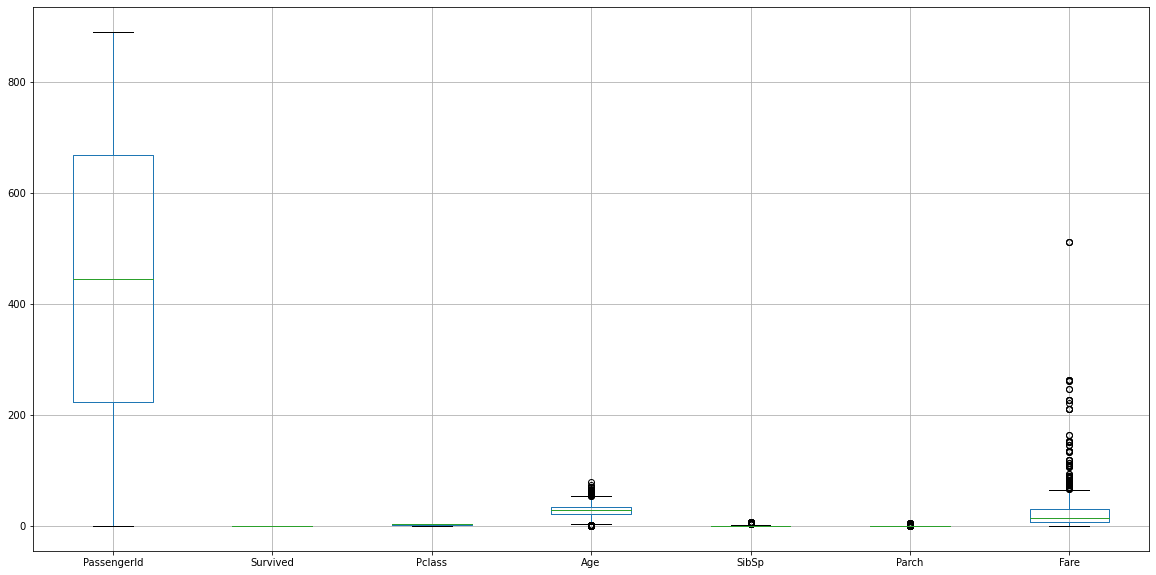

In [ ]:
%matplotlib inline

df = df.drop([],axis=1)
df.boxplot(figsize=(20,10))

Clustering
Below is where we split data based on classes. There are three classes.

#**Sorting Dataframes**#
Below is where we sort dataframes by passenger class.

In [ ]:
df_sort = df.sort_values(by='Pclass',ascending=True)
df_sort

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,C
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C
306,307,1,1,"Fleming, Miss. Margaret",female,27.0,0,0,17421,110.8833,C
...,...,...,...,...,...,...,...,...,...,...,...
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,C
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,S
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,S


Below we select the first class, second class, and third class.

#**Handling Outliers Cont'd**#
We handle outliers by splitting up our data into three different categories based on class and getting rid of the outliers withing each class (*if possible).

In [ ]:
df_split_1c = df_sort["Pclass"] == 1 #select first class
df_split_1c

445     True
310     True
309     True
307     True
306     True
       ...  
379    False
381    False
382    False
371    False
890    False
Name: Pclass, Length: 891, dtype: bool

In [ ]:
df_split_2c = df_sort["Pclass"] == 2 #select second class
df_split_2c

445    False
310    False
309    False
307    False
306    False
       ...  
379    False
381    False
382    False
371    False
890    False
Name: Pclass, Length: 891, dtype: bool

In [ ]:
df_split_3c = df_sort["Pclass"] == 3 #select third class
df_split_3c

445    False
310    False
309    False
307    False
306    False
       ...  
379     True
381     True
382     True
371     True
890     True
Name: Pclass, Length: 891, dtype: bool

This lets us verify that we separated the data properly.

In [ ]:
df_1c = df[df_split_1c]
df_1c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


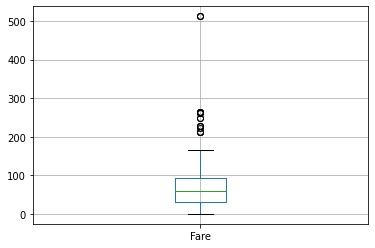

In [ ]:
%matplotlib inline

boxplot = df_1c.boxplot(column=['Fare'])  

#**Feature Normalization**#
We use normalization to put numbers in a standard form so that two values can easily be compared. This is used to help us with outliers.

In [ ]:
df_1c['Fare_z_score'] = zscore(df_1c['Fare'])
df_1c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.164598
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.397125
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,-0.412950
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,-0.736645
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S,-0.622193
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,-0.404105
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S,-1.012225
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,-0.012742
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,-0.692526


In [ ]:
z_score_1c = df_1c['Fare_z_score'] <= 1.5
z_score_1c

1      True
3      True
6      True
11     True
23     True
       ... 
871    True
872    True
879    True
887    True
889    True
Name: Fare_z_score, Length: 216, dtype: bool

In [ ]:
df_1c_outlied = df_1c[z_score_1c]
df_1c_outlied

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.164598
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.397125
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,-0.412950
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,-0.736645
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S,-0.622193
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,-0.404105
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S,-1.012225
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,-0.012742
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,-0.692526


In [ ]:
print('Number of rows before discarding outliers = %d' % (df_1c.shape[0]))
print('Number of rows after discarding outliers = %d' % (df_1c_outlied.shape[0]))

Number of rows before discarding outliers = 216
Number of rows after discarding outliers = 196


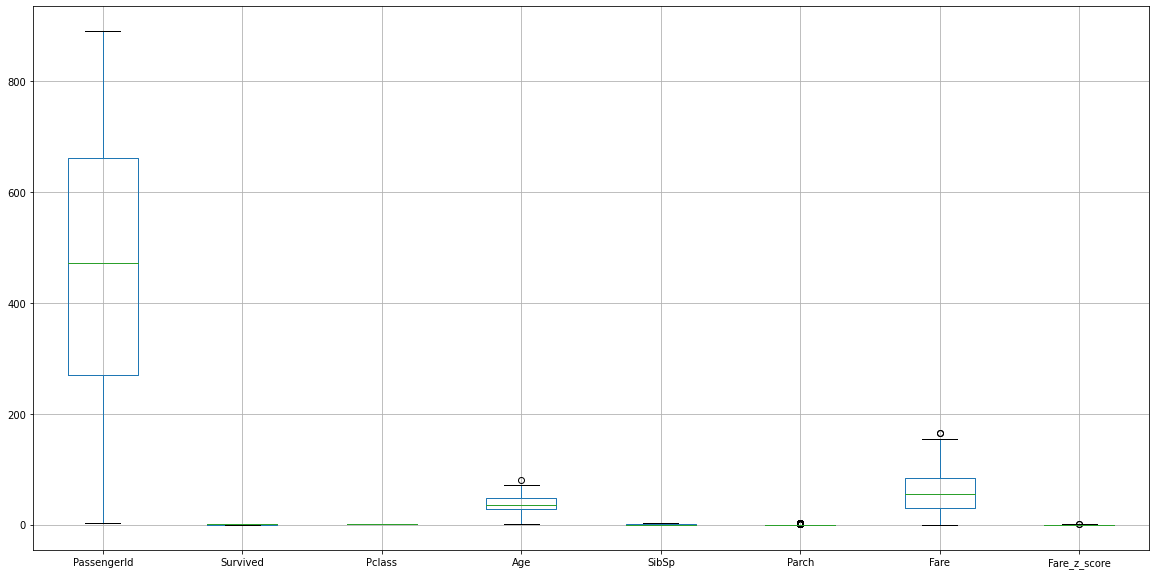

In [ ]:
%matplotlib inline

df_1c_outlied = df_1c_outlied.drop([],axis=1)
df_1c_outlied.boxplot(figsize=(20,10))

Now we do the same second class, except now we will skip ahead to avoid unnecessary repetition.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Number of rows before discarding outliers = 184
Number of rows after discarding outliers = 174


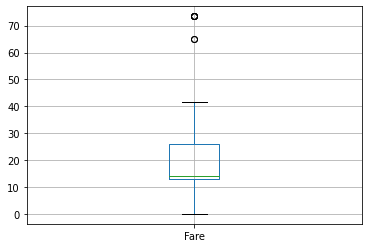

In [ ]:
df_2c = df[df_split_2c]
df_2c

%matplotlib inline

boxplot = df_2c.boxplot(column=['Fare'])  

df_2c['Fare_z_score'] = zscore(df_2c['Fare'])
df_2c

z_score_2c = df_2c['Fare_z_score'] <= 1.5
z_score_2c

df_2c_outlied = df_2c[z_score_2c]
df_2c_outlied

print('Number of rows before discarding outliers = %d' % (df_2c.shape[0]))

print('Number of rows after discarding outliers = %d' % (df_2c_outlied.shape[0]))


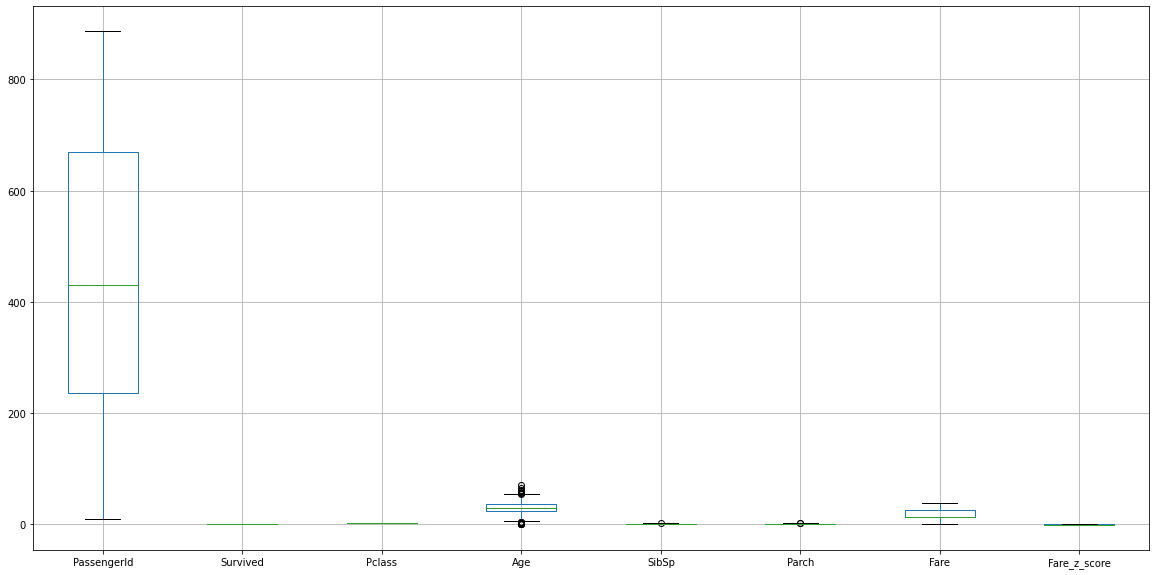

In [ ]:
df_2c_outlied = df_2c_outlied.drop([],axis=1)
df_2c_outlied.boxplot(figsize=(20,10))

And finally, we finish off with third class.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Number of rows before discarding outliers = 457
Number of rows after discarding outliers = 457


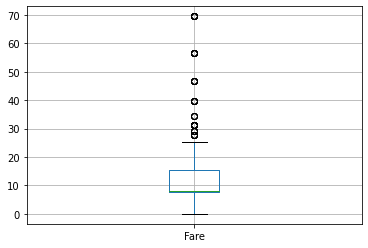

In [ ]:
df_3c = df[df_split_3c]
df_3c

%matplotlib inline

boxplot = df_3c.boxplot(column=['Fare'])  

df_3c['Fare_z_score'] = zscore(df_3c['Fare'])
df_3c

z_score_3c = df_3c['Fare_z_score'] <= 1.5
z_score_3c

df_3c_outlied = df_3c[z_score_3c]
df_3c_outlied

print('Number of rows before discarding outliers = %d' % (df_3c_outlied.shape[0]))
print('Number of rows after discarding outliers = %d' % (df_3c_outlied.shape[0]))

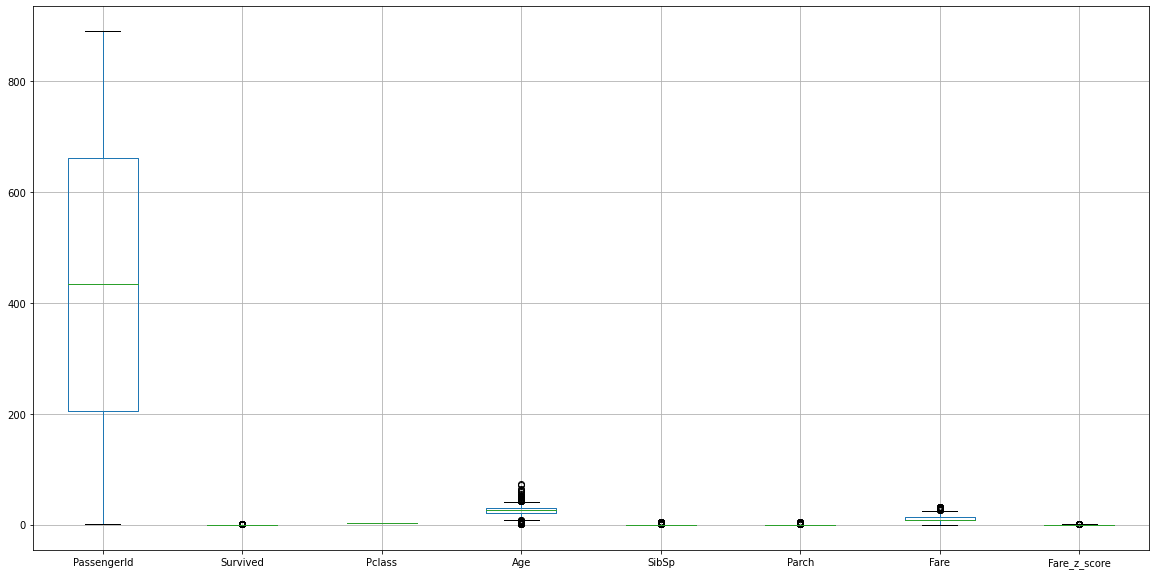

In [ ]:
df_3c_outlied = df_3c_outlied.drop([],axis=1)
df_3c_outlied.boxplot(figsize=(20,10))

#**Concatenating Rows and Columns**#

We now concatentate all rows and columns from the three separated classes after removing outliers to form a new and improved dataframe.

In [ ]:
df_all_class_data = [df_1c_outlied, df_2c_outlied, df_3c_outlied]
df_concat = pd.concat(df_all_class_data)
df_concat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.164598
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.397125
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,-0.412950
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,-0.736645
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S,-0.622193
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S,-0.268469
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,-0.563103
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,1.313043
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S,0.830727


3. Data Reduction - Volume of data is reduced - (Dimensionality Reduction, Data Cube Aggregation, Attribute Subset Reduction) Remove redundant, noisy data, sample data?

#**Aggregation**#
We can take a subset of the concatenated data and use this data for our aggregation.

In [ ]:
reduced_data = df_concat[['PassengerId', 'Age', 'Sex', 'Survived', 'Pclass', 'Embarked']]
reduced_data

,PassengerId,Age,Sex,Survived,Pclass,Embarked
1,2,38.0,female,1,1,C
3,4,35.0,female,1,1,S
6,7,54.0,male,0,1,S
11,12,58.0,female,1,1,S
23,24,28.0,male,1,1,S
...,...,...,...,...,...,...
882,883,22.0,female,0,3,S
884,885,25.0,male,0,3,S
885,886,39.0,female,0,3,Q
888,889,27.0,female,0,3,S


We can aggregate the data on the fields Sex, Embarked, and Pclass, and then find the minimum, maximum, and mean age. Additionally, we can find the mean survival rate of passengers. This gives us a better understanding of the passengers information and whether the embarked port, age, and survival rate have any correlation.

In [ ]:
passenger_age_survival = reduced_data.groupby(["Sex","Embarked","Pclass"]).agg({'PassengerId' : 'count' , 'Age':['min','max','mean'], 'Survived': ['count', 'mean']})
passenger_age_survival

PassengerId    Age                  Survived          
                             count    min   max       mean    count      mean
Sex    Embarked Pclass                                                       
female C        1               36  16.00  60.0  35.638889       36  0.972222
                2                5  14.00  28.0  21.800000        5  1.000000
                3               23   0.75  45.0  18.000000       23  0.652174
       Q        1                1  33.00  33.0  33.000000        1  1.000000
                2                2  27.00  30.0  28.500000        2  1.000000
                3               33  15.00  39.0  25.742424       33  0.727273
       S        1               45   2.00  63.0  33.622222       45  0.955556
                2               65   2.00  57.0  29.484615       65  0.907692
                3               77   1.00  63.0  23.207792       77  0.402597
male   C        1               37  17.00  71.0  39.648649       37  0.405405
                2                9   1.00  36.0  26.722222        9  0.222222
                3               43   0.42  45.5  26.684186       43  0.232558
       Q        1                1  44.00  44.0  44.000000        1  0.000000
                2                1  57.00  57.0  57.000000        1  0.000000
                3               39   2.00  70.5  28.692308       39  0.076923
       S        1               76   0.92  80.0  39.531842       76  0.368421
                2               92   0.67  70.0  31.150326       92  0.163043
                3              242   1.00  74.0  27.859504      242  0.115702

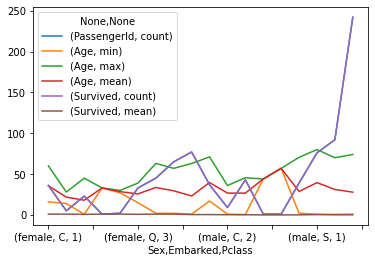

In [ ]:
passenger_age_survival.plot()

We can focus in further and analyze the age and survival rate statistics of passengers under 20.

In [ ]:
young_pssngrs = reduced_data.loc[reduced_data["Age"] < 20].groupby(["Sex","Pclass"]).agg({"PassengerId": "count","Age": ["min", "max", "mean"], 'Survived': ['count', 'mean']})
young_pssngrs

PassengerId   Age                  Survived          
                    count   min   max       mean    count      mean
Sex    Pclass                                                      
female 1               11  2.00  19.0  15.727273       11  0.909091
       2               15  2.00  19.0  11.400000       15  1.000000
       3               42  0.75  19.0  10.642857       42  0.547619
male   1                6  0.92  19.0  11.653333        6  0.666667
       2               18  0.67  19.0  10.129444       18  0.555556
       3               51  0.42  19.0  13.674902       51  0.215686

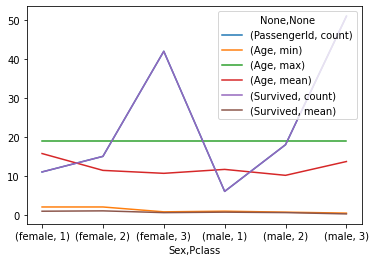

In [ ]:
young_pssngrs.plot()

#**Sampling**#
We will apply sampling with replacement.

We will initially display the first five records of the table.

In [ ]:
df_concat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.164598
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.397125
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,-0.412950
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,-0.736645
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S,-0.622193


We will then take a sample size of three where the three records are radomly selected.

In [ ]:
sample = df_concat.sample(n=3)
sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,S,-0.491219
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,S,-0.572621
298,299,1,1,"Saalfeld, Mr. Adolphe",male,29.0,0,0,19988,30.5000,S,-0.686133


Now we can perform sampling with replacement to create a sample of which the size is equal to 1% of the cleaned and concatenated dataset.

In [ ]:
replaced_sample = df_concat.sample(frac=0.01, replace=True, random_state=1)
replaced_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,C,0.372389
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,S,-0.572621
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,C,0.643812
778,779,0,3,"Kilgannon, Mr. Thomas J",male,29.0,0,0,36865,7.7375,Q,-0.504673
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,29.0,0,0,312993,7.7750,S,-0.501486
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,C,-0.547873
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,C,-0.094957
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,S,-0.057606


#**Sorting Dataframes**#
Here, we just sort a dataframe based on passenger ID after concatenating columns.

In [ ]:
df_concat = df_concat.sort_values(by='PassengerId',ascending=True)
df_concat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.546105
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.164598
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.488737
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.397125
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,-0.478113
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,-0.572621
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,-0.692526
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S,0.830727
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,-0.692526


#**Saving Dataframes**#
Here, we just save a copy of a dataframe.

In [ ]:
df_concat.to_csv('preprocessed_titanic.csv',index=False)
print("Done")

Done


In [ ]:
df_saved=pd.read_csv("preprocessed_titanic.csv",na_values=['NA','?'])
df_saved

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.546105
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.164598
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.488737
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.397125
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,-0.478113
...,...,...,...,...,...,...,...,...,...,...,...,...
822,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,-0.572621
823,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,-0.692526
824,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S,0.830727
825,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,-0.692526


Encoding

In [ ]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low


In [ ]:
import os
import pandas as pd
import numpy as np

path = ""

filename_read = os.path.join(path,"preprocessed_titanic.csv")
passenger_age_survival = pd.read_csv(filename_read,na_values=['NA','?'])

print("Before drop: {}".format(passenger_age_survival.columns))
passenger_age_survival.drop('Name', axis=1, inplace=True)
passenger_age_survival.drop('Ticket', axis=1, inplace=True)
#passenger_age_survival.drop('Cabin', axis=1, inplace=True)
passenger_age_survival.drop('SibSp', axis=1, inplace=True)
passenger_age_survival.drop('Parch', axis=1, inplace=True)
passenger_age_survival.drop('Fare', axis=1, inplace=True)
passenger_age_survival.drop('Fare_z_score', axis=1, inplace=True)
passenger_age_survival.drop('Embarked', axis=1, inplace=True)

print("After drop: {}".format(passenger_age_survival.columns))
passenger_age_survival[0:5]

Before drop: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Fare_z_score'],
      dtype='object')
After drop: Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age'], dtype='object')


,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


#**Label Encoding**#
We use encoding before converting our dataframe into inputs and outputs.

In [ ]:
encode_text_index(passenger_age_survival,"Sex")   # label encoding
passenger_age_survival

passenger_age_survival

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,1,22.0
1,2,1,1,0,38.0
2,3,1,3,0,26.0
3,4,1,1,0,35.0
4,5,0,3,1,35.0
...,...,...,...,...,...
821,887,0,2,1,27.0
822,888,1,1,0,19.0
823,889,0,3,0,27.0
824,890,1,1,1,26.0


In [ ]:
#passenger_age_survival=pd.read_csv("titanic2.csv",na_values=['NA','?'])

encode_text_index(passenger_age_survival,"Sex")    # encoding first before you call to_xy()

passenger_age_survival

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,1,22.0
1,2,1,1,0,38.0
2,3,1,3,0,26.0
3,4,1,1,0,35.0
4,5,0,3,1,35.0
...,...,...,...,...,...
821,887,0,2,1,27.0
822,888,1,1,0,19.0
823,889,0,3,0,27.0
824,890,1,1,1,26.0


#**Call to_xy()**#
Coverts some columns of our dataframe into inputs and one into an output.

In [ ]:
x,y = to_xy(passenger_age_survival,'Sex')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working


In [ ]:
x

array([[  1.,   0.,   3.,  22.],
       [  2.,   1.,   1.,  38.],
       [  3.,   1.,   3.,  26.],
       ...,
       [889.,   0.,   3.,  27.],
       [890.,   1.,   1.,  26.],
       [891.,   0.,   3.,  32.]], dtype=float32)

In [ ]:
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Training and Validation

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
passenger_age_survival['encoded_survived'] = le.fit_transform(passenger_age_survival['Survived'])

passenger_age_survival[0:5]

,PassengerId,Survived,Pclass,Sex,Age,encoded_survived
0,1,0,3,1,22.0,0
1,2,1,1,0,38.0,1
2,3,1,3,0,26.0,1
3,4,1,1,0,35.0,1
4,5,0,3,1,35.0,0


#**Training/Test Split**#

In [ ]:
import pandas as pd
import io
import numpy as np
import os
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(passenger_age_survival[['Pclass', 'Sex', 'Age']], passenger_age_survival['encoded_survived'], test_size=0.25, random_state=42)

In [ ]:
x_train.shape

(619, 3)

In [ ]:
y_train.shape

(619,)

In [ ]:
x_test.shape

(207, 3)

In [ ]:
y_test.shape

(207,)

In [ ]:
x_train

,Pclass,Sex,Age
181,2,0,24.00
423,1,1,65.00
377,3,1,21.00
543,1,0,39.00
158,1,1,56.00
...,...,...,...
71,3,0,30.00
106,3,1,70.50
270,3,0,24.00
435,3,0,0.75


In [ ]:
y_train

181    0
423    0
377    0
543    1
158    0
      ..
71     1
106    0
270    0
435    1
102    0
Name: encoded_survived, Length: 619, dtype: int64

In [ ]:
x_test

,Pclass,Sex,Age
648,3,1,42.0
174,3,0,19.0
67,3,1,25.0
168,3,0,27.0
275,1,1,29.0
...,...,...,...
210,3,0,27.0
806,1,0,47.0
744,3,1,27.0
90,3,0,28.0


In [ ]:
y_test

648    0
174    1
67     0
168    1
275    1
      ..
210    0
806    1
744    1
90     0
500    1
Name: encoded_survived, Length: 207, dtype: int64

In [ ]:
mean1 = x_train['Pclass'].mean()
print('Mean class: ')
print(mean1)
mean2 = x_train['Sex'].mean()
print('Mean \'sex\': ')
print(mean2)
mean3 = x_train['Age'].mean()
print('Mean age: ')
print(mean3)

Mean class: 
2.3117932148626816
Mean 'sex': 
0.6558966074313409
Mean age: 
29.627350565428113


In [ ]:
std1 = x_train['Pclass'].std()
print('Std. Dev. class: ')
print(std1)
std2 = x_train['Sex'].std()
print('Std. Dev. \'sex\': ')
print(std2)
std3 = x_train['Age'].std()
print('Std. Dev. age: ')
print(std3)

Std. Dev. class: 
0.8368765220495619
Std. Dev. 'sex': 
0.47545920127372704
Std. Dev. age: 
12.937142200228914


In [ ]:
mean1t = x_test['Pclass'].mean()
print('Mean class: ')
print(mean1t)
mean2t = x_test['Sex'].mean()
print('Mean \'sex\': ')
print(mean2t)
mean3t = x_test['Age'].mean()
print('Mean age: ')
print(mean3t)

Mean class: 
2.3333333333333335
Mean 'sex': 
0.642512077294686
Mean age: 
30.211787439613527


In [ ]:
std1t = x_test['Pclass'].std()
print('Std. Dev. class: ')
print(std1t)
std2t = x_test['Sex'].std()
print('Std. Dev. \'sex\': ')
print(std2t)
std3t = x_test['Age'].std()
print('Std. Dev. age: ')
print(std3t)

Std. Dev. class: 
0.8125233379769972
Std. Dev. 'sex': 
0.4804220116933136
Std. Dev. age: 
12.95466104944684


#**Discretization**#
Discretization involves transforming a continuous-valued attribute to a categorical attribute.

22.00     26
38.00      9
26.00     17
35.00     16
29.00    134
        ... 
0.67       1
30.50      2
0.42       1
34.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

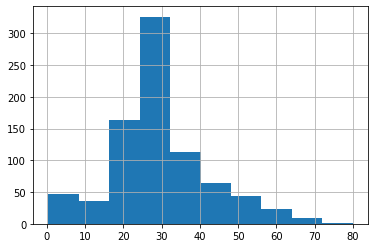

In [ ]:
passenger_age_survival['Age'].hist(bins=10)
passenger_age_survival['Age'].value_counts(sort=False)

In [ ]:
bins = pd.cut(passenger_age_survival['Age'],4)
bins.value_counts(sort=False)

(0.34, 20.315]     158
(20.315, 40.21]    527
(40.21, 60.105]    120
(60.105, 80.0]      21
Name: Age, dtype: int64

In [ ]:
bins = pd.qcut(passenger_age_survival['Age'],4)
bins.value_counts(sort=False)

(0.419, 23.0]    219
(23.0, 29.0]     294
(29.0, 35.0]     108
(35.0, 80.0]     205
Name: Age, dtype: int64

#**Principle Component Analysis**#
Involves reducing the number of attributes in the data by projecting the data from its original high-dimensional space into a lower-dimensional space. 

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [ ]:
dfi = load_iris()
X = dfi.data
y = dfi.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
pca = PCA(n_components= 2)
pca.fit(x)
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [ ]:
Z = pca.transform(x)

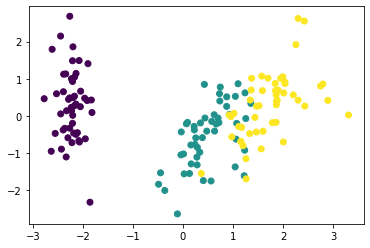

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Z[:,0], Z[:,1], c=y)

#Developing and documenting human insights on preprocessed data and possible effect on predictions (Jared)

In [ ]:
#Data Quality Issues:
  #Missing Value: Sometimes raw values can be hidden, or not properly collected. 
  #Inconsistent Data: Can also be known as Duplicate Data, where merging data sources takes place.
  #Noisy Data: Deals with outliers, where the raw data was recorded incorrectly, by human mistake, or any wrongfully recorded data.

#Insight on Preprocessed Data:
  #Not preprocessing data can lead to the data set to false prediction or an outcome not true.
  #Our mean, standard deviation, outliers, etc. of the data set can be significantly different from raw vs preprocessed data.
  #Preprocessed data will help transform our raw data into the cleanest data set possible for our testing.

#Possible Effects on Prediction:
  #Having a clean dataset can conclude to more accurate predictions or outcomes of test.
  #Ex: Our dataset of the titanic concludes the standard deviation of survival 0.5. Using a dirty data set can fluctuate our standard 
      #deviation of survival if we had missing data or include duplicates values.


# Data Split into Training and Test data (Marco)

In [ ]:
import pandas as pd
import io
import numpy as np
import os
from sklearn.model_selection import train_test_split

data = pd.read_csv('titanic2.csv')

data[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
training_data, testing_data = train_test_split(data, test_size=0.2, random_state=25)

print(f"Number of training examples (80%): {training_data.shape[0]}")
print(f"Number of testing examples (20%): {testing_data.shape[0]}")

Number of training examples (80%): 753
Number of testing examples (20%): 189


In [ ]:
# The ratios used are 80% training and 20% testing to follow the same standard that was presented in the Data Preprocessing tutorial. 

# Now we compute the mean on the training and testing data to search for any possible inaccuracies. The mean function is used to compute the average in the following attributes: Survived, Pclass, Age, SibSP, Parch, and Fare. 

In [ ]:
print("Mean of training data.")
print("\n")
mean = training_data["Survived"].mean()
print("Mean of Survival: ")
print(round(mean,1))
print("\n")

mean = training_data["Pclass"].mean()
print("Mean of Ticket class: ")
print(round(mean))
print("\n")

mean = training_data["Age"].mean()
print("Mean of Age: ")
print(round(mean))
print("\n")

mean = training_data["SibSp"].mean()
print("Mean of number of siblings / spouses aboard the Titanic: ")
print(round(mean))
print("\n")

mean = training_data["Parch"].mean()
print("Mean of number of parents / children aboard the Titanic: ")
print(round(mean))
print("\n")

mean = training_data["Fare"].mean()
print("Mean of Fare: ")
print(round(mean,2))

Mean of training data.


Mean of Survival: 
0.4


Mean of Ticket class: 
2


Mean of Age: 
30


Mean of number of siblings / spouses aboard the Titanic: 
1


Mean of number of parents / children aboard the Titanic: 
0


Mean of Fare: 
31.92


In [ ]:
print("Mean of testing data.")
print("\n")
mean = testing_data["Survived"].mean()
print("Mean of Survival: ")
print(round(mean,1))
print("\n")

mean = testing_data["Pclass"].mean()
print("Mean of Ticket class: ")
print(round(mean))
print("\n")

mean = testing_data["Age"].mean()
print("Mean of Age: ")
print(round(mean))
print("\n")

mean = testing_data["SibSp"].mean()
print("Mean of number of siblings / spouses aboard the Titanic: ")
print(round(mean))
print("\n")

mean = testing_data["Parch"].mean()
print("Mean of number of parents / children aboard the Titanic: ")
print(round(mean))
print("\n")

mean = testing_data["Fare"].mean()
print("Mean of Fare: ")
print(round(mean,2))

Mean of testing data.


Mean of Survival: 
0.4


Mean of Ticket class: 
2


Mean of Age: 
28


Mean of number of siblings / spouses aboard the Titanic: 
1


Mean of number of parents / children aboard the Titanic: 
0


Mean of Fare: 
37.26


In [ ]:
#      The mean of the testing data and the mean of the training data is used to compute the averages of the data where applicable. Also, these means can be compared to establish an accurate connection from the training data portion and testing data portion.
# Most of the categories for the trained data were the same for the testing data which gives us the impression that both the training and testing data coincide and are accurate. However, both the "Mean of Age" and the "Mean of Fare" had slightly different 
# values in their mean computations for each data split, which may result in data inaccuracies. The standard deviation function should then be used to calculate a range from the mean and determine whether a data point is "normal" or "unusual".

# Now we will compute the standard deviation for the training and testing data. The standard deviation function is used to calculate the data spread of the following attributes: Survived, Pclass, Age, SibSP, Parch, and Fare.  

In [ ]:
print("Standard deviation of training data.")
print("\n")

stdDeviation = training_data["Survived"].std()
print("Standard deviation of Survival: ")
print(round(stdDeviation,1))
print("\n")

stdDeviation = training_data["Pclass"].std()
print("Standard deviation of Ticket class: ")
print(round(stdDeviation))
print("\n")

stdDeviation = training_data["Age"].std()
print("Standard deviation of Age: ")
print(round(stdDeviation))
print("\n")

stdDeviation = training_data["SibSp"].std()
print("Standard deviation of number of siblings / spouses aboard the Titanic: ")
print(round(stdDeviation))
print("\n")

stdDeviation = training_data["Parch"].std()
print("Standard deviation of number of parents / children aboard the Titanic: ")
print(round(stdDeviation))
print("\n")

stdDeviation = training_data["Fare"].std()
print("Standard deviation of Fare: ")
print(round(stdDeviation,2))

Standard deviation of training data.


Standard deviation of Survival: 
0.5


Standard deviation of Ticket class: 
1


Standard deviation of Age: 
14


Standard deviation of number of siblings / spouses aboard the Titanic: 
1


Standard deviation of number of parents / children aboard the Titanic: 
1


Standard deviation of Fare: 
48.35


In [ ]:
print("Standard deviation of testing data.")
print("\n")

stdDeviation = testing_data["Survived"].std()
print("Standard deviation of Survival: ")
print(round(stdDeviation,1))
print("\n")

stdDeviation = testing_data["Pclass"].std()
print("Standard deviation of Ticket class: ")
print(round(stdDeviation))
print("\n")

stdDeviation = testing_data["Age"].std()
print("Standard deviation of Age: ")
print(round(stdDeviation))
print("\n")

stdDeviation = testing_data["SibSp"].std()
print("Standard deviation of number of siblings / spouses aboard the Titanic: ")
print(round(stdDeviation))
print("\n")

stdDeviation = testing_data["Parch"].std()
print("Standard deviation of number of parents / children aboard the Titanic: ")
print(round(stdDeviation))
print("\n")

stdDeviation = testing_data["Fare"].std()
print("Standard deviation of Fare: ")
print(round(stdDeviation,2))

Standard deviation of testing data.


Standard deviation of Survival: 
0.5


Standard deviation of Ticket class: 
1


Standard deviation of Age: 
15


Standard deviation of number of siblings / spouses aboard the Titanic: 
1


Standard deviation of number of parents / children aboard the Titanic: 
1


Standard deviation of Fare: 
65.92


In [ ]:
#      The standard deviation is used to compute the spread of a dataset and how far from the mean a data point is classified as "normal". Most of the categories for the trained data were the same for the testing data which gives us the impression 
# that both the training and testing data have a very low spread for those specific categories. However, the "Standard deviation of Fare" had different values in their standard deviation computations for each data split and gives us the impression that 
# both data splits have a high spread in the "Fare" category. The difference in each standard deviation is expected because standard deviation is specific to each dataset and denotes how far a data point is accurate from the mean. 

# For example, the "Mean of Fare" for the training dataset was 31.92 and the "Standard deviation of Fare" was 48.3, and adding the two values will give us a range from the mean. 
# If a data point is within the range from the mean, then it considered "normal" and expected. 
# If a data point is outside of the range from the mean, then it is considered "unusual" and unexpected.

# Comparing Datasets and Developing Intuitions (Marco)

The ratios used were 80% training and 20% testing to follow the same standard that was presented in the Data Preprocessing tutorial.
The mean function was used to compute the average in the following attributes: Survived, Pclass (Ticket class), Age, SibSP (number of siblings/spouses), Parch (number of parents/children), and Fare.
The mean of the testing data and the mean of the training data is used to compute the averages of the data where applicable. Also, these means can be compared to establish an accurate connection from both data splits. Most of the attributes for the data splits were similar which gives us the impression that both data splits coincide and are accurate. However, both the "Mean of Age" and the "Mean of Fare" had slightly different values for each data split, which may result in data inaccuracies. The standard deviation function should then be used to calculate a range from the mean and determine whether a data point is "normal" or "unusual".
The standard deviation function was used to compute the data spread of the attributes above.
The standard deviation is used to compute the spread of a dataset and how far from the mean a data point is classified as "normal". Most of the attributes for the data splits were similar which gives us the impression that both data splits have a low spread for those specific attributes. However, the "Standard deviation of Fare" had different values in their standard deviation computations for each data split and gives us the impression that both data splits have a high spread in the "Fare" category. The difference in each standard deviation is expected because standard deviation is specific to each dataset and denotes how far a data point is accurate from the mean.
For example, the "Mean of Fare" for the training dataset was 31.92 and the "Standard deviation of Fare" was 48.35, and adding the two values will give us a range from the mean.
If a data point is within the range from the mean, then it is considered "normal" and expected.
If a data point is outside of the range from the mean, then it is considered "unusual" and unexpected.